In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# Setting the dataset path
import pathlib
data_dir = pathlib.Path('C:/Users/Admin/Downloads/archive (1)/New Masks Dataset/Train')

In [4]:
# Count the total number of images in a mask directory
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

605


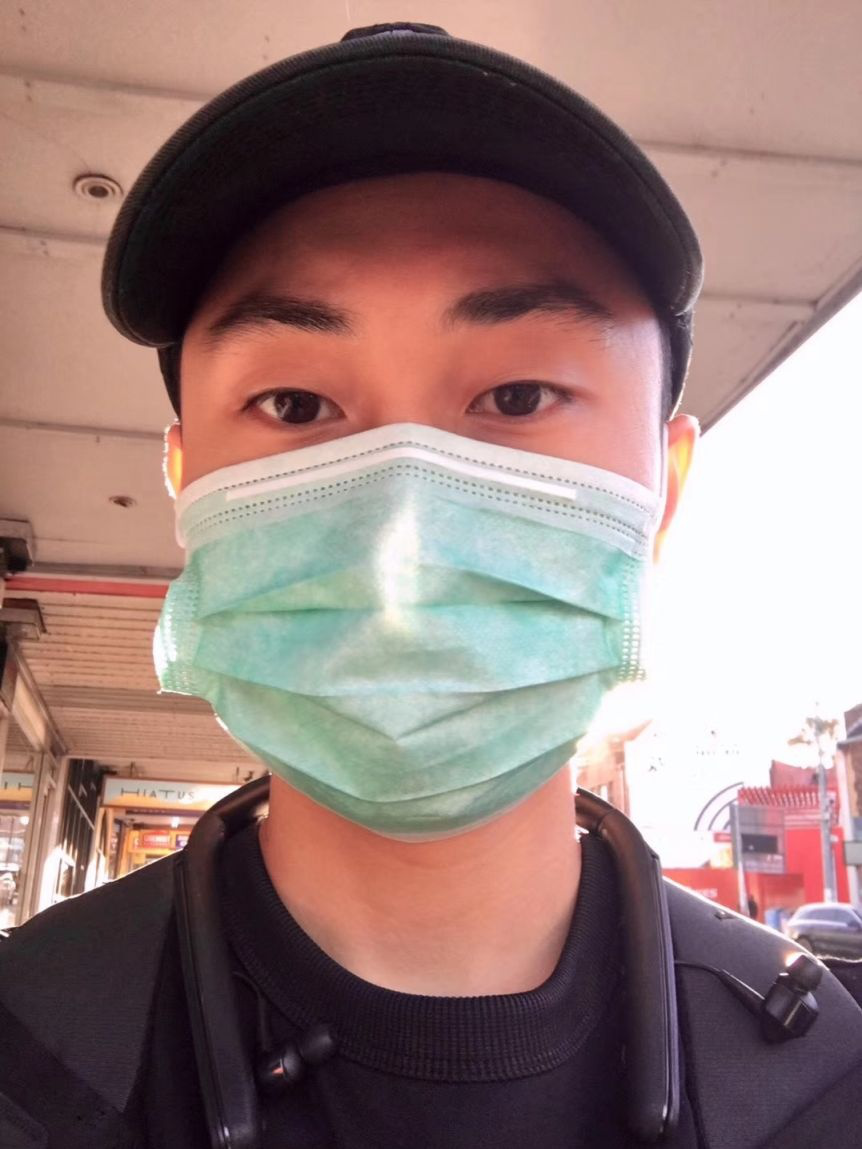

In [5]:
# Example of the Mask dataset 
drive = list(data_dir.glob('Mask/*'))
PIL.Image.open(str(drive[45]))

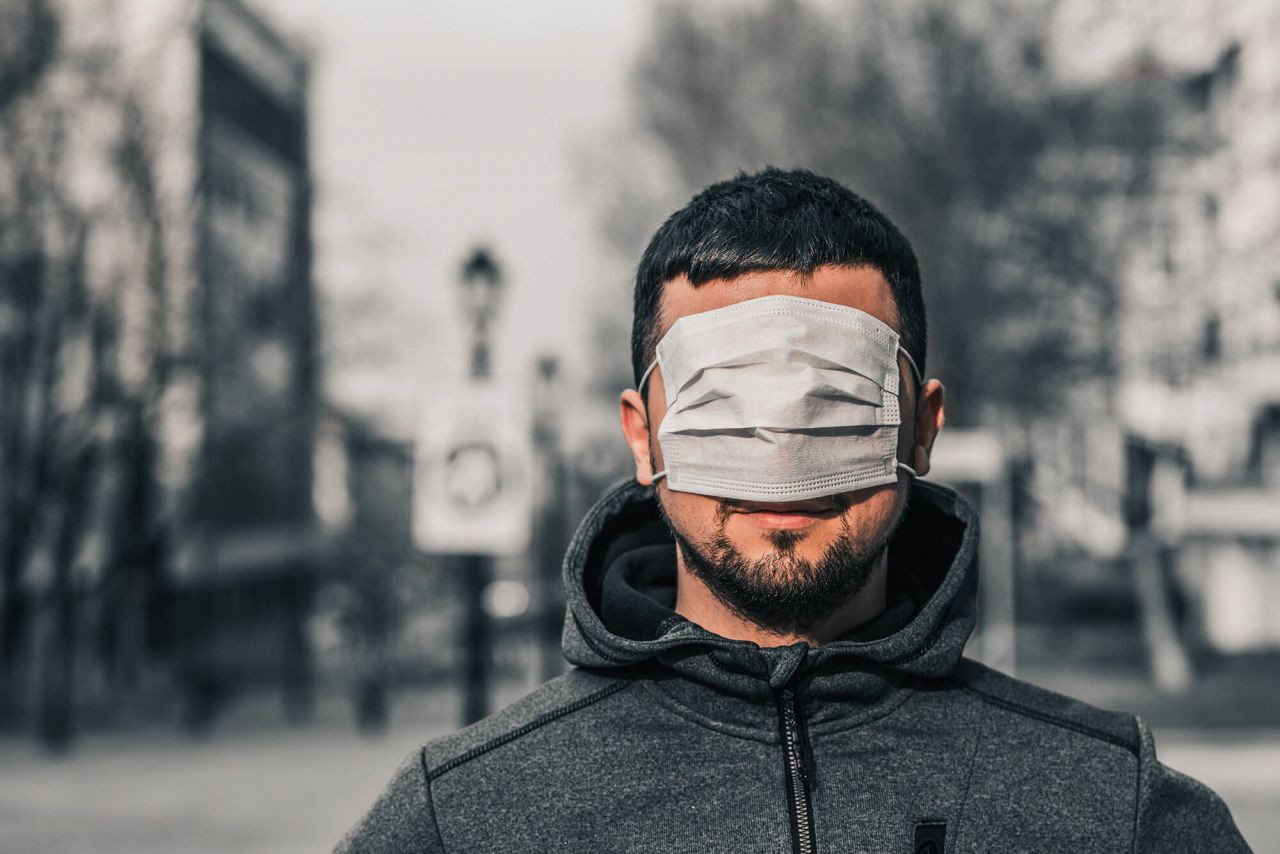

In [6]:
# Example of the Non Mask dataset 
Nonmask = list(data_dir.glob('Non mask/*'))
PIL.Image.open(str(Nonmask[304]))

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

In [8]:
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",#random_state
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 605 files belonging to 2 classes.
Using 484 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=32)

Found 605 files belonging to 2 classes.
Using 121 files for validation.


In [10]:
len(train_ds.class_names)

2

In [11]:
class_names = train_ds.class_names
print(class_names)

['Mask', 'Non Mask']


In [13]:
num_classes = len(class_names)

model = Sequential([
    #input Layer
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  
    #hidden layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
    #fully connect network
  layers.Flatten(),#flatten
  layers.Dense(128, activation='relu'),#fully connect network
  layers.Dense(num_classes)#output layer
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
16/16 [==============================] - 37s 2s/step - loss: 1.2527 - accuracy: 0.5620 - val_loss: 0.9238 - val_accuracy: 0.4380
Epoch 2/10
16/16 [==============================] - 27s 2s/step - loss: 0.7040 - accuracy: 0.5475 - val_loss: 0.5583 - val_accuracy: 0.8182
Epoch 3/10
16/16 [==============================] - 27s 2s/step - loss: 0.4122 - accuracy: 0.8471 - val_loss: 0.2765 - val_accuracy: 0.8678
Epoch 4/10
16/16 [==============================] - 26s 2s/step - loss: 0.2873 - accuracy: 0.8988 - val_loss: 0.3360 - val_accuracy: 0.8843
Epoch 5/10
16/16 [==============================] - 27s 2s/step - loss: 0.2681 - accuracy: 0.8864 - val_loss: 0.2506 - val_accuracy: 0.8843
Epoch 6/10
16/16 [==============================] - 27s 2s/step - loss: 0.2380 - accuracy: 0.9194 - val_loss: 0.2706 - val_accuracy: 0.8843
Epoch 7/10
16/16 [==============================] - 26s 2s/step - loss: 0.1860 - accuracy: 0.9236 - val_loss: 0.2661 - val_accuracy: 0.8926
Epoch 8/10
16/16 [==

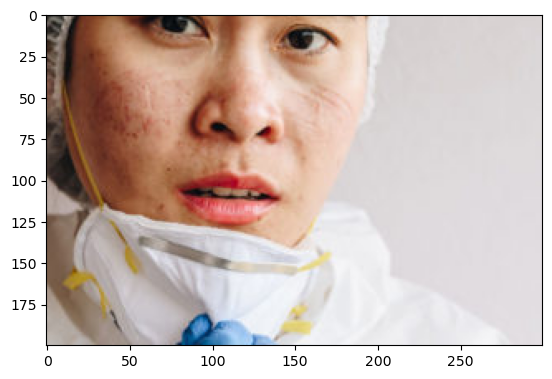

<PIL.Image.Image image mode=RGB size=180x180 at 0x1FEAD142CD0>
1/1 [==============================] - 0s 261ms/step
predictions   [[0.20354627 0.31648862]]
This image most likely belongs to Non Mask with a 52.82 percent confidence.


In [22]:
# import pathlib
# pic = pathlib.Path('C:/Dhruv/Face-mask/Test/Mask')

pic = r'C:\Dhruv\test_nomask1.jpg'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(pic)
imgplot = plt.imshow(img)
plt.show()

# for i in pic:
img = tf.keras.utils.load_img(pic, target_size=(180, 180))
print(img)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print("predictions  ", predictions)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
    )